<a href="https://colab.research.google.com/github/eshasadia/ComputerVision-Project/blob/main/Covid_Inception_and_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Input Image Dataset From Dropbox



In [1]:

!wget https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=0

--2021-02-08 13:39:27--  https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9w8nmj791c9ogsx/data_upload_v3.zip [following]
--2021-02-08 13:39:27--  https://www.dropbox.com/s/raw/9w8nmj791c9ogsx/data_upload_v3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ec014b0c951cfd9c149c0c2da.dl.dropboxusercontent.com/cd/0/inline/BIhwxqGt1dcxAytTYwSsL3LysKa8OffGuySDaDBUQbpriIUdlCoKFSedZcYrwdPLxpy7_3R6nX_-yhn-waJO18fao_VF5isxJjZDwVGpL7uTbPqG8E9sbvEXlAipCE4j88I/file# [following]
--2021-02-08 13:39:27--  https://uc6ec014b0c951cfd9c149c0c2da.dl.dropboxusercontent.com/cd/0/inline/BIhwxqGt1dcxAytTYwSsL3LysKa8OffGuySDaDBUQbpriIUdlCoKFSedZcYrwdPLxpy7_3R6nX_-yhn-waJO18fa

Importing Libraries 

In [2]:

import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
import pathlib
import tensorflow as tf
import tensorflow_datasets as tfds 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Dense
from keras.optimizers import SGD


Importing Dataset from Kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eshasadia","key":"56fd0fbcab21fd83e9a910e4d9e6ccc9"}'}

In [4]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d nabeelsajid917/covid-19-x-ray-10000-images

 92% 85.0M/92.7M [00:00<00:00, 70.6MB/s]
100% 92.7M/92.7M [00:01<00:00, 91.0MB/s]


In [6]:
!ls

 covid-19-x-ray-10000-images.zip   kaggle.json
'data_upload_v3.zip?dl=0'	   sample_data


Unzip Compressed Dataset

In [7]:
!unzip covid-19-x-ray-10000-images.zip

Archive:  covid-19-x-ray-10000-images.zip
  inflating: covid19.model           
  inflating: dataset/covid/covid (1).jpeg  
  inflating: dataset/covid/covid (1).jpg  
  inflating: dataset/covid/covid (1).png  
  inflating: dataset/covid/covid (10).jpeg  
  inflating: dataset/covid/covid (10).jpg  
  inflating: dataset/covid/covid (10).png  
  inflating: dataset/covid/covid (11).jpeg  
  inflating: dataset/covid/covid (11).jpg  
  inflating: dataset/covid/covid (11).png  
  inflating: dataset/covid/covid (12).jpeg  
  inflating: dataset/covid/covid (12).jpg  
  inflating: dataset/covid/covid (13).jpeg  
  inflating: dataset/covid/covid (13).jpg  
  inflating: dataset/covid/covid (14).jpeg  
  inflating: dataset/covid/covid (14).jpg  
  inflating: dataset/covid/covid (15).jpeg  
  inflating: dataset/covid/covid (15).jpg  
  inflating: dataset/covid/covid (16).jpeg  
  inflating: dataset/covid/covid (16).jpg  
  inflating: dataset/covid/covid (17).jpeg  
  inflating: dataset/covid/covid (

Loading Images From DataSet

In [8]:

def load_kaggle_dataset(folder):
    print("Loading from folder: ", os.path.basename(folder))
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img= cv2.resize(img, (150,150))
        if img is not None:
            images.append(img)
            if os.path.basename(folder) == 'normal':
              labels.append(0)
            elif os.path.basename(folder) == 'covid':
              labels.append(1)
    return images, labels

Calculating Data Size

In [9]:

K_train_pos = "/content/dataset/covid"
K_train_neg = "/content/dataset/normal"

K_img_train_pos, K_label_train_pos = load_kaggle_dataset(K_train_pos)
K_img_train_neg, K_label_train_neg = load_kaggle_dataset(K_train_neg)

print ("Number of Training Images (Positive):   ", len(K_img_train_pos))
print ("Number of Training Images (Negative):   ", len(K_img_train_neg))

Loading from folder:  covid
Loading from folder:  normal
Number of Training Images (Positive):    70
Number of Training Images (Negative):    28


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
data = '/content/dataset'

Checking Data Categories

In [12]:
os.listdir(data)

['normal', 'covid']

Normal Image Display

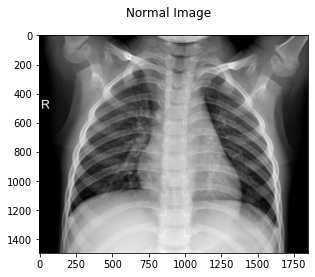

In [13]:
normal_images = []
for img_path in glob.glob(data + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0], cmap='gray')

Covid Image Display

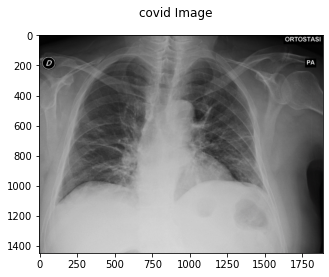

In [14]:
covid_images = []
for img_path in glob.glob(data + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid Image')
plt.imshow(covid_images[0], cmap='gray')


Parameters Setting for Image Pre-Processing

In [15]:
Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE = 6

Model Compilation

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [17]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Displaying Model Layers & Params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 250)       144250    
_________________________________________________________________
activation_2 (Activation)    (None, 70, 70, 250)       0

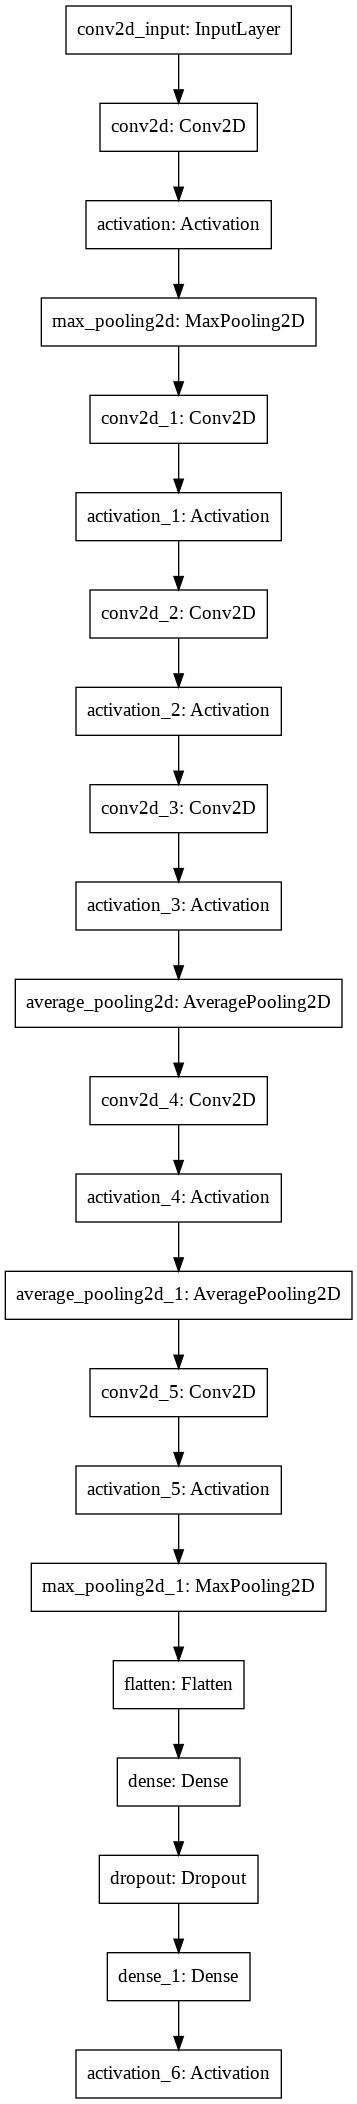

In [18]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

Data Augmentation & Training


In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/45
12/12 [==============================] - 12s 368ms/step - loss: 0.8781 - accuracy: 0.5254 - val_loss: 0.6115 - val_accuracy: 0.7083
Epoch 2/45
12/12 [==============================] - 3s 293ms/step - loss: 1.0279 - accuracy: 0.7708 - val_loss: 0.6618 - val_accuracy: 0.7083
Epoch 3/45
12/12 [==============================] - 3s 282ms/step - loss: 0.5953 - accuracy: 0.7442 - val_loss: 0.6849 - val_accuracy: 0.7083
Epoch 4/45
12/12 [==============================] - 3s 295ms/step - loss: 0.6452 - accuracy: 0.7476 - val_loss: 0.7514 - val_accuracy: 0.7083
Epoch 5/45
12/12 [==============================] - 3s 291ms/step - loss: 0.7411 - accuracy: 0.7481 - val_loss: 0.5715 - val_accuracy: 0.7083
Epoch 6/45
12/12 [==============================] - 3s 274ms/step - loss: 0.6508 - accuracy: 0.6757 - val_loss: 0.5756 - val_accuracy: 0.7083
Epoch 7/45
12/12 [==============================] - 3s 279ms/step - loss: 0.7106 - accuracy: 0.7156 - val_loss: 0.6122 - val_accuracy: 0.7083
Epoch

Plotting Loss and Accuracy Graphs 

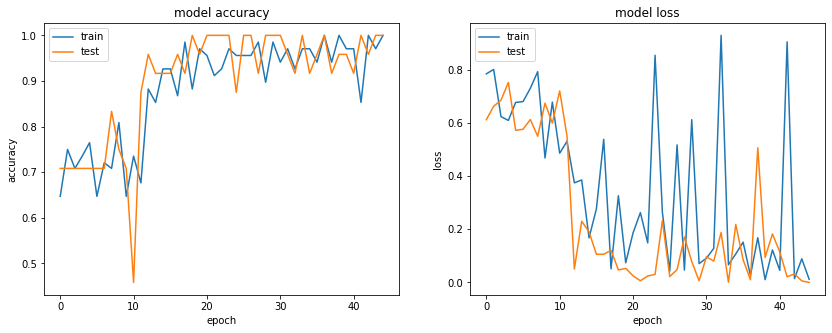

In [20]:
model.save_weights('Squential_trained_wts.h5')
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

Training & Validation Accuracy

In [21]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 1.0
validation_accuracy 1.0


Comparison of Original & Predicted Lables

In [22]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


Confusion Matrix

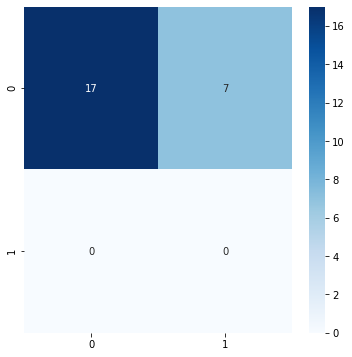

In [23]:
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

Prediction on Data

In [24]:
correct = np.nonzero(predicted_class_indices == label)[0]
pred_class = predicted_class_indices.astype(int)

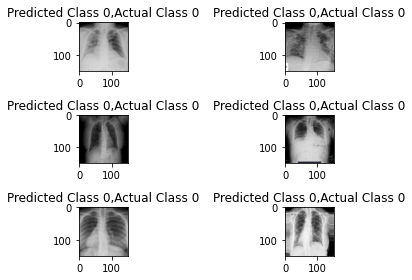

In [25]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(validation_generator[0][0][c].reshape(150,150,3))
    plt.title("Predicted Class {},Actual Class {}".format(pred_class.reshape(1,-1)[0][c], label[c]))
    plt.tight_layout()
    i += 1

# **Using Local Weights Inception Model**

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-02-08 13:45:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   105MB/s    in 0.8s    

2021-02-08 13:45:59 (105 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



**Creating A Pretrained Model**

In [27]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(include_top=False, weights=None, input_shape=(150,150,3))
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable=False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

**Appending to the Pretrained Model**

In [28]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras


x = keras.layers.Flatten()(last_output)

x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

model1 = keras.Model(inputs=pre_trained_model.input, outputs=x)

**Model Compilation**

In [29]:
model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

**Training**

In [30]:
history1 = model1.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 5,
            verbose = 2)

Epoch 1/5
13/13 - 8s - loss: 0.1423 - accuracy: 0.9054 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/5
13/13 - 3s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 3/5
13/13 - 4s - loss: 0.0251 - accuracy: 0.9865 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 4/5
13/13 - 3s - loss: 9.1242e-04 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 5/5
13/13 - 3s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.8479e-04 - val_accuracy: 1.0000


Plotting the **Loss and Accuracy**

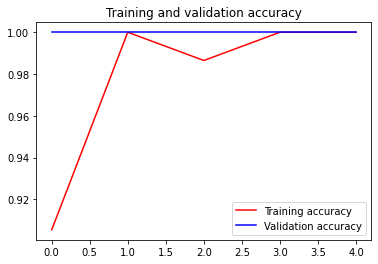

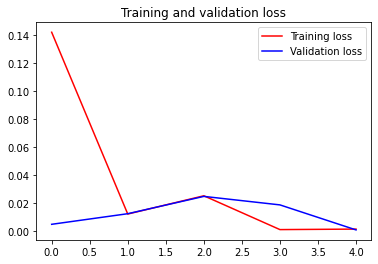

In [31]:
import matplotlib.pyplot as plt
model1.save_weights('Inception_trained_wts.h5')
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


**Comparing the Labels and Predictions**

In [32]:
import numpy as np
pred = model.predict(validation_generator)
predicted_class_indices = np.argmax(pred,axis=1)
labels = dict((value,key) for key,value in validation_generator.class_indices.items())
predictions = [labels[key] for key in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{0: 'covid', 1: 'normal'}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']
